In [1]:
import networkx as nx # version 2.2
import matplotlib.pyplot as plt
import re
import cvxpy as cp
import operator #to sort elements in a list of tuples
import itertools
import math
import numpy as np
import os
import sys
import time

import Init_NetRate as Init
import Cascade_generation_functions_NetRate as Gen
import CVX_functions as cvx

In [2]:
network_file_name = "./Graph_test_SG.txt"
cascade_file_name = "./Cascade_test_SG.txt" # can not use the graphs generated by NetInf (for now, there is some bugs with the time limit)
window = 10 # Time limit of the observation of a cascade
beta = 1 # probability of an edge transmitting the disease 
model = 0 # choose between exp and power law (for now only exp is implemented)
eps = 0.0005 #Lower bound on the value of alpha (we do not want to have alpha = 0 since we have some division and log of alpha)
alpha_init = 0.01 # Initilization value of alpha for the SGD
min_alpha = 0.05 # Value of alpha at which we consider it as an edge in the network
gamma = 0.0005 # learning rate
K = 1000 #number of itterations
max_alpha = 10 #upper bound of alpha. Otherwise it may degenerate

In [3]:
'''
Evaluate the objective function given a cascade and the alphas

Input :
    -alpha_mat : matrix of size |V|*|V| containing all the alpha_i,j
    -cascade_graph : Directed graph object (DAG), of a cascade
    -G_star : Directed graph containing only the nodes
    -window : int representing the time limit until which we observe a cascade propagation
Output :
    -obj : value of the objective funtion restricted to one cascade
'''
def Objective_function(alpha_mat,cascade_graph_c,G_star,window,eps):
    sum_psi1 = 0
    sum_psi2 = 0
    sum_psi3 = 0
    for i in cascade_graph_c.nodes():
        sum_psi3_tmp = 0
        t_i = cascade_graph_c.nodes[i]["time"]
        for m in G_star.nodes():
            if alpha_mat[i,m]==eps :
                alpha_mat[i,m] = 0
            if alpha_mat[m,i]==eps:
                alpha_mat[m,i] = 0
            if m not in cascade_graph_c.nodes():
                sum_psi1 += -alpha_mat[i,m]*(window-t_i)
            elif (m,i) in cascade_graph_c.edges():
                t_m = cascade_graph_c.nodes[m]["time"]
                sum_psi2 += -alpha_mat[m,i]*(t_i-t_m)
                sum_psi3_tmp += alpha_mat[m,i]
        if sum_psi3_tmp!=0:
            sum_psi3 += math.log(sum_psi3_tmp)
    obj = sum_psi1+sum_psi2+sum_psi3
    return obj

In [4]:
def True_objective_value(G_true,cascade_graph_dic,window,eps):
    A_true = np.zeros((G_true.number_of_nodes(),G_true.number_of_nodes()))
    for edge in G_true.edges():
        A_true[edge[0],edge[1]] = G_true.edges[edge[0],edge[1]]["weight"][0]
                
    true_obj = 0
    for c in cascade_graph_dic:
        cascade = cascade_graph_dic[c]
        true_obj += Objective_function(A_true,cascade,G_true,window,eps)
    return true_obj
def Infered_objective_value(alpha_mat,G_star,cascade_graph_dic,window,eps):
    obj = 0
    for c in cascade_graph_dic:
        cascade = cascade_graph_dic[c]
        obj += Objective_function(alpha_mat,cascade,G_star,window,eps)
    return obj

In [5]:
# G_true = Gen.Generate_random_graph(200,400)
# Cascades = Gen.Generate_all_cascades(G_true,-1000,window,model,beta)
# Gen.Save_cascade_to_file("Cascade_test_SG.txt",Cascades,G_true)
# Gen.Save_graph_to_file("Graph_test_SG.txt",G_true)
# G_star,DAG_C_dic = Init.Init("Cascade_test_SG.txt")
G_true = Init.Load_ground_truth(network_file_name)
G_star, DAG_C_dic = Init.Init(cascade_file_name)
A_hat = np.zeros((G_star.number_of_nodes(),G_star.number_of_nodes()))

All nodes were read


In [6]:
matrix_list,nb_casc_node = cvx.Create_matrices(G_true,DAG_C_dic,window)
A_cvx,obj_cvx = cvx.Infer_Network_edges(G_true,matrix_list,nb_casc_node,DAG_C_dic)

For node  0
optimal
-475.26491252607747
For node  1
optimal
-699.7936074984291
For node  2
Use another solver
optimal_inaccurate
-500.78610422820316
For node  3
optimal
-570.9282922463691
For node  4
optimal
-434.80143565766554
For node  5
optimal
-0.0
For node  6
optimal
-0.0
For node  7
optimal
-684.9146786879618
For node  8
optimal
-32.13255130172341
For node  9
optimal
-856.594785561591
For node  10
optimal
-0.0
For node  11
optimal
-12.040878423878603
For node  12
optimal
-951.8366391928342
For node  13
optimal
-13.238930180127669
For node  14
optimal
-722.2233678484722
For node  15
optimal
-684.8178273577654
For node  16
optimal
-558.5702095101976
For node  17
optimal
-644.5855751579952
For node  18
optimal
-82.21642637911867
For node  19
optimal
-601.613888264716
For node  20
Use another solver
WARN: A->p (column pointers) not strictly increasing, column 1276 empty
WARN: A->p (column pointers) not strictly increasing, column 1277 empty
WARN: A->p (column pointers) not strictly i

C:\Users\joach\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:781: RuntimeWarning: overflow encountered in long_scalars
  if self.max_big_small_squared < big*small**2:



optimal
-810.5575935591869
For node  26
optimal
-493.37437698406063
For node  27
optimal
-428.4888798905984
For node  28
optimal
-6.993945395780584
For node  29
optimal
-828.509986041427
For node  30
optimal
-520.9623676236797
For node  31
optimal
-642.0186514983238
For node  32
optimal
-0.0
For node  33
optimal
-269.3741574989712
For node  34
optimal
-15.226127567722955
For node  35
optimal
-689.7573438122998
For node  36
optimal
-152.98651294096425
For node  37
optimal
-367.19959321948556
For node  38
optimal
-445.1967280123337
For node  39
optimal
-703.1865292514043
For node  40
optimal
-514.5032513778845
For node  41
optimal
-863.2239443509118
For node  42
optimal
-912.9313041519054
For node  43
optimal
-0.0
For node  44
optimal
-713.8679408404919
For node  45
optimal
-0.0
For node  46
optimal
-586.3566097720155
For node  47
optimal
-374.9854082533269
For node  48
optimal
-652.226654998257
For node  49
optimal
-866.2328912646578
For node  50
optimal
-787.0567783087821
For node  51

C:\Users\joach\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:782: RuntimeWarning: overflow encountered in long_scalars
  self.max_big_small_squared = big*small**2


optimal
-744.586891630805
For node  103
optimal
-705.1231283335338
For node  104
optimal
-824.6752759326608
For node  105
optimal
-875.3916294106131
For node  106
optimal
-1160.0712264264607
For node  107
optimal
-910.4011906998212
For node  108
optimal
-391.48219172670434
For node  109
optimal
-36.19201795940139
For node  110
optimal
-793.4131559029568
For node  111
optimal
-376.1319673625597
For node  112
optimal
-427.657149679016
For node  113
optimal
-442.5490662000793
For node  114
optimal
-438.6010618492588
For node  115
optimal
-690.3310198954878
For node  116
optimal
-420.35688333987196
For node  117
optimal
-694.5988040446417
For node  118
optimal
-22.40522305992285
For node  119
optimal
-585.9633065661634
For node  120
optimal
-909.0836813115033
For node  121
optimal
-13.300779777762155
For node  122
optimal
-682.8755059651008
For node  123
Use another solver
WARN: A->p (column pointers) not strictly increasing, column 648 empty
WARN: A->p (column pointers) not strictly incre

In [7]:
obj_maison = Infered_objective_value(A_cvx,G_star,DAG_C_dicG_C_dic,window,eps)
print("obj my code is : ",obj_maison)

obj my code is :  -94203.92568894567


In [8]:
print(obj_cvx)

-94204.0110241317


In [32]:
A_hat = np.zeros((G_star.number_of_nodes(),G_star.number_of_nodes()))

In [27]:
obj_true = True_objective_value(G_true,DAG_C_dic,window,eps)
obj_true

-94422.97254329176

In [33]:
t_s = time.time()
k=0
c_index_list = np.random.choice(list(range(0,len(DAG_C_dic))),K,replace = False)
obj_per_itter = []
obj_fct = 0
while k <K :
    c_index = c_index_list[k]
    DAG_c = DAG_C_dic[c_index]
    for i in G_true.nodes():
        if i in DAG_c.nodes(): # case of infected node
            t_i = DAG_c.nodes[i]["time"]
            parents = list(DAG_c.predecessors(i))
            sum_grad = 0
            for papa in parents :
                if A_hat[papa,i]==0 :
                    A_hat[papa,i] = alpha_init #this may not be the right way (it init potentially a lot of edges)
                sum_grad += A_hat[papa,i]
            for papa in parents :
                t_papa = DAG_c.nodes[papa]["time"]
                if t_i-t_papa<=0:
                    print("Time Error ")
                    print("t_i is :", t_i)
                    print("parent infection time is : ",t_papa)
                A_hat[papa,i] = max(A_hat[papa,i]-gamma*((t_i-t_papa)-1/sum_grad),eps) #SG with grad of infected nodes
                if A_hat[papa,i]> max_alpha:
                    A_hat[papa,i] = max_alpha
        else : # case of uninfected nodes
            for j in DAG_c.nodes():
                t_j = DAG_c.nodes[j]["time"]
                if window-t_j <0 :
                    print ("Time Error")
                    print("window is :",window)
                    print("time of infection of node j is : ",t_j)
                A_hat[j,i] = max(A_hat[j,i]-gamma*(window-t_j),eps) # SG with grad for !infected nodes (can only decrease)
    
    if k%100==0:
        print("itteration ", k)
        obj_fct = Infered_objective_value(A_hat,G_star,DAG_C_dic,window,eps)
        obj_per_itter.append(obj_fct)
        print("objective function is : ",obj_fct)
    k+=1
t_f = time.time()
elapsed_time = t_f-t_s
print("running time : ", elapsed_time)

itteration  0
objective function is :  -9348.567962464309
itteration  100
objective function is :  -153487.39678389538
itteration  200
objective function is :  -142107.4840907627
itteration  300
objective function is :  -137452.0854934583
itteration  400
objective function is :  -132085.4160498489
itteration  500
objective function is :  -127505.57074827653
itteration  600
objective function is :  -123405.56335809246
itteration  700
objective function is :  -120938.18625237496
itteration  800
objective function is :  -121682.52878236094
itteration  900
objective function is :  -119223.82892646102
running time :  276.36093163490295


In [34]:
'''
Precision and recall computation
'''
correct = 0
edge_G_star = list(G_star.edges())
G_star.remove_edges_from(edge_G_star)
for i in range(0,G_true.number_of_nodes()):
    for j in range(0,G_true.number_of_nodes()):
        if A_hat[i,j] >min_alpha:
            G_star.add_edge(i,j,weight = A_hat[i,j])
            if (i,j) in G_true.edges():
                correct +=1
#                 print("edge ",(i,j))
#                 print("alpha is ",A_hat[i,j])
print("Precision :",correct/G_star.number_of_edges())
print("Recall :",correct/G_true.number_of_edges())
print("Number of correct infered edges : ",correct)
print("Number of edges in G_hat :",G_star.number_of_edges())
print("Number of edges in the true network ",G_true.number_of_edges())

Precision : 0.7145631067961165
Recall : 0.92
Number of correct infered edges :  368
Number of edges in G_hat : 515
Number of edges in the true network  400


In [35]:
'''
mean absolute error
'''
mae = 0
nb_correcte_edges=0
for edge in G_true.edges():
    if edge in G_star.edges():
        nb_correcte_edges +=1
        true_alpha = G_true.edges[edge]["weight"][0]
        approx_alpha = A_hat[edge[0],edge[1]]
        mae += abs(true_alpha-approx_alpha)/true_alpha #normalized mean absolute error
#         print("For edge " + str(edge)+ " the true weight is : " + str(true_alpha))
#         print("For edge " + str(edge)+ " the approx weight is : " + str(approx_alpha))
try :
    mae = mae/nb_correcte_edges
except ZeroDivisionError:
    print ("There is no correct edge")
print("Normalized mean absolute error is : ",mae)

Normalized mean absolute error is :  0.721161331904245


In [36]:
'''
mean square error
'''
mse = 0
nb_correcte_edges=0
for edge in G_true.edges():
    if edge in G_star.edges():
        nb_correcte_edges +=1
        true_alpha = G_true.edges[edge]["weight"][0]
        approx_alpha = A_hat[edge[0],edge[1]]
        mse += pow((true_alpha-approx_alpha),2) # mean square error
#         print("For edge " + str(edge)+ " the true weight is : " + str(true_alpha))
#         print("For edge " + str(edge)+ " the approx weight is : " + str(approx_alpha))
try :
    mse = mse/nb_correcte_edges
except ZeroDivisionError:
    print ("There is no correct edge")
print(" Mean square error is : ",mse)

 Mean square error is :  0.18895957280428838


In [44]:
diff_obj_per_itter_pos = [-x for x in obj_per_itter]
approx_run_time = [1/k for k in list(range(1,K))]

In [40]:
K/100

10.0

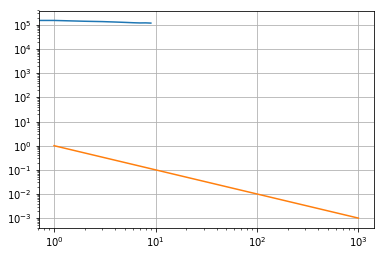

In [45]:

plt.plot(list(range(0,int(K/100))),diff_obj_per_itter_pos)
plt.plot(list(range(1,K)),approx_run_time)
plt.loglog()
plt.grid()

In [ ]:
Gen.Save_graph_to_file("Infered_network.txt",G_star)